In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
a = "/content/drive/MyDrive/loan_sanction_test.csv"
df = pd.read_csv(a)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
df.shape

(367, 12)

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [ ]:
df.isnull().sum().sum()

84

<Axes: >

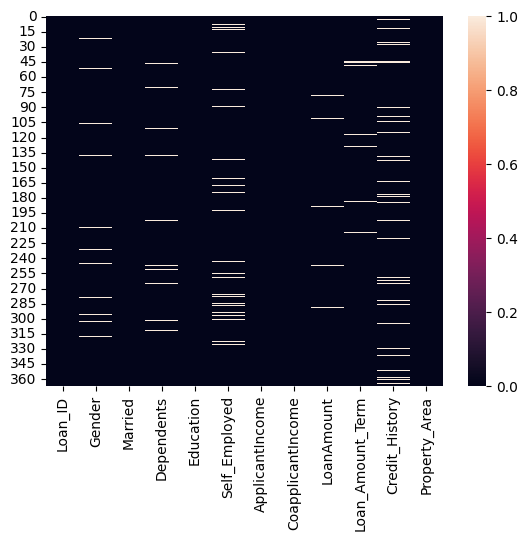

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
for column in ['Gender', 'Dependents', 'Self_Employed']:
    # Calculate the mode of the column
    mode_value = df[column].mode()[0]
    # Fill missing values with the mode
    df[column].fillna(mode_value, inplace=True)

<ipython-input-11-87ae392c239b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)


In [ ]:
for column in ['LoanAmount','Credit_History','Loan_Amount_Term']:
    # Calculate the median of the column
    median_value = df[column].median()
    # Fill missing values with the median
    df[column].fillna(median_value, inplace=True)

<ipython-input-12-daff7ffb13f2>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_value, inplace=True)


<Axes: >

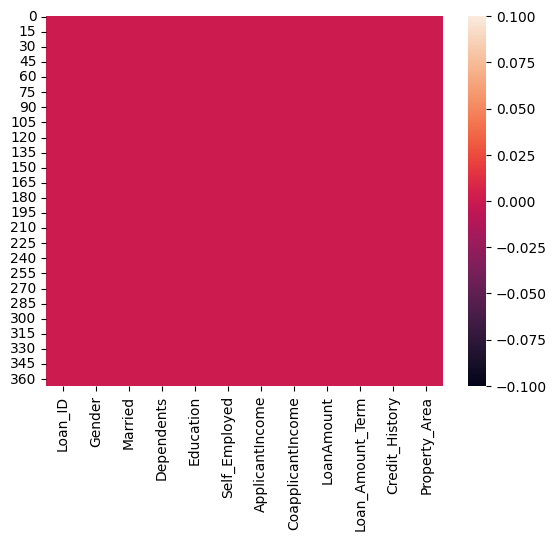

In [ ]:
sns.heatmap(df.isnull())

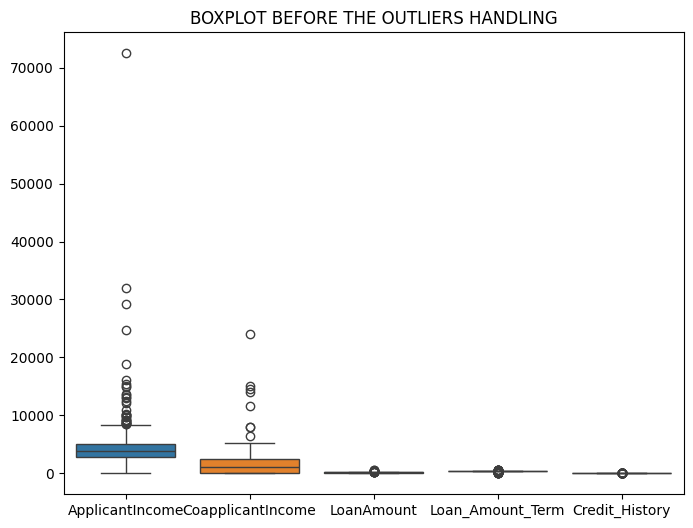

In [ ]:
# BOXPLOT BEFORE THE OUTLIERS HANDLING
plt.figure(figsize=(8, 6))
sns.boxplot(df)
plt.title("BOXPLOT BEFORE THE OUTLIERS HANDLING")
plt.show()


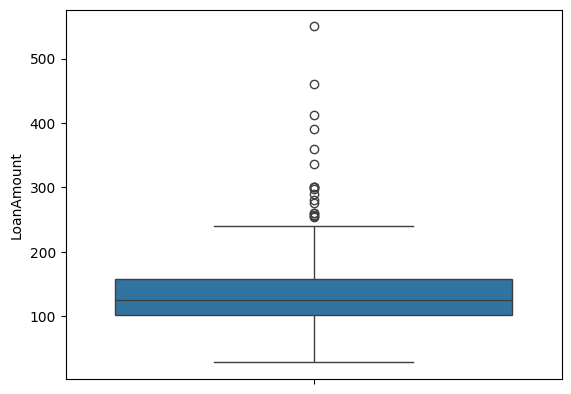

Q1 is 101.0
Q3 is 157.5
IQR is 56.5
Upper bound is 242.25
Lower bound is 16.25
Number of outliers in 'your_column': 18


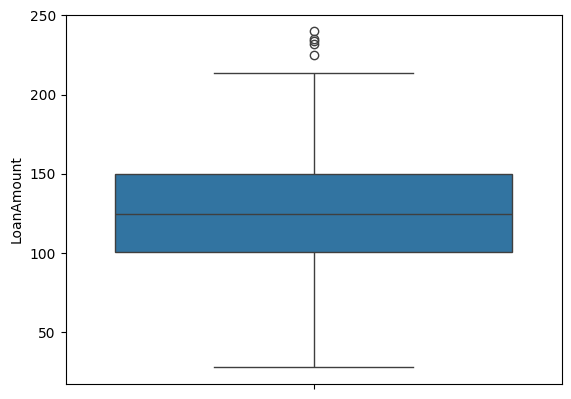

In [ ]:
# Creating Boxplot before filling outliers
sns.boxplot(df['LoanAmount'])
plt.show()

#
Q1 = df['LoanAmount'].quantile(0.25)
print(f'Q1 is {Q1}')
Q3 = df['LoanAmount'].quantile(0.75)
print(f'Q3 is {Q3}')
IQR = Q3 - Q1
print(f'IQR is {IQR}')
# Define upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
print(f'Upper bound is {upper_bound}')
lower_bound = Q1 - 1.5 * IQR
print(f'Lower bound is {lower_bound}')

# Identify outliers
outliers = df[(df['LoanAmount'] > upper_bound) | (df['LoanAmount'] < lower_bound)]
num_outliers = len(outliers)
print(f"Number of outliers in 'your_column': {num_outliers}")


# Filling the outliers with median
median_income = df['LoanAmount'].median()
df['LoanAmount'] = np.where(df['LoanAmount'] > upper_bound, median_income, df['LoanAmount'])
df['LoanAmount'] = np.where(df['LoanAmount'] < lower_bound, median_income, df['LoanAmount'])



# Creating Boxplot after filling outliers
sns.boxplot(df['LoanAmount'])
plt.show()

Q1 is 101.0
Q3 is 150.0
IQR is 49.0
Upper bound is 223.5
Lower bound is 27.5


<Axes: ylabel='LoanAmount'>

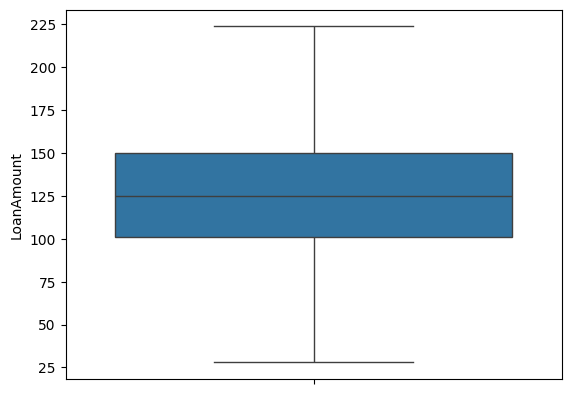

In [ ]:

#
Q1 = df['LoanAmount'].quantile(0.25)
print(f'Q1 is {Q1}')
Q3 = df['LoanAmount'].quantile(0.75)
print(f'Q3 is {Q3}')
IQR = Q3 - Q1
print(f'IQR is {IQR}')
# Define upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
print(f'Upper bound is {upper_bound}')
lower_bound = Q1 - 1.5 * IQR
print(f'Lower bound is {lower_bound}')

# Identify outliers
outliers = df[(df['LoanAmount'] > upper_bound) | (df['LoanAmount'] < lower_bound)]

#NOW i m using capping method to hande outliers in my dataset

df['LoanAmount'] = np.where(df['LoanAmount'] > upper_bound, upper_bound, df['LoanAmount'])
df['LoanAmount'] = np.where(df['LoanAmount'] < lower_bound, lower_bound, df['LoanAmount'])



# Creating Boxplot after filling outliers
sns.boxplot(df['LoanAmount'])

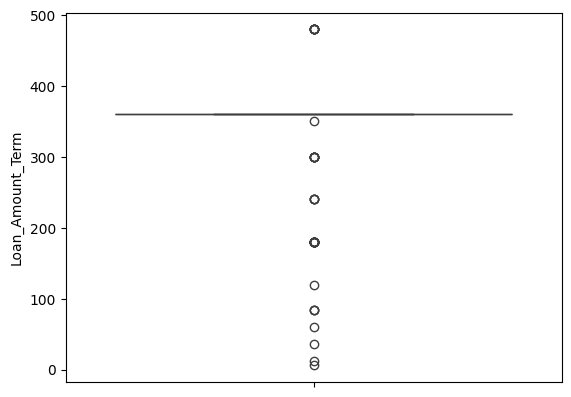

Q1 is 360.0
Q3 is 360.0
IQR is 0.0
Upper bound is 360.0
Lower bound is 360.0
Number of outliers in 'your_column': 50


<Axes: ylabel='Loan_Amount_Term'>

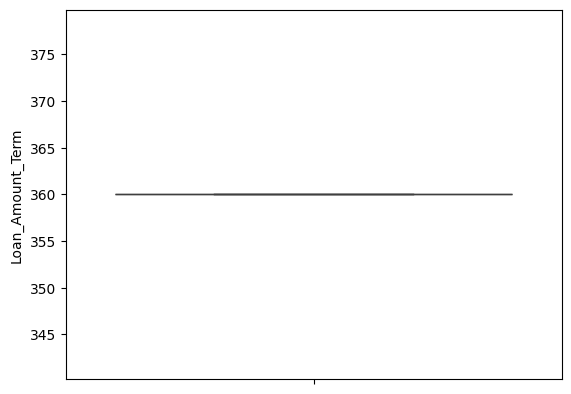

In [ ]:
# Creating Boxplot before filling outliers
sns.boxplot(df['Loan_Amount_Term'])
plt.show()

#
Q1 = df['Loan_Amount_Term'].quantile(0.25)
print(f'Q1 is {Q1}')
Q3 = df['Loan_Amount_Term'].quantile(0.75)
print(f'Q3 is {Q3}')
IQR = Q3 - Q1
print(f'IQR is {IQR}')
# Define upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
print(f'Upper bound is {upper_bound}')
lower_bound = Q1 - 1.5 * IQR
print(f'Lower bound is {lower_bound}')

# Identify outliers
outliers = df[(df['Loan_Amount_Term'] > upper_bound) | (df['Loan_Amount_Term'] < lower_bound)]
num_outliers = len(outliers)
print(f"Number of outliers in 'your_column': {num_outliers}")

# here i m using median to handel my outliers
median_income = df['Loan_Amount_Term'].median()
df['Loan_Amount_Term'] = np.where(df['Loan_Amount_Term'] > upper_bound, median_income, df['Loan_Amount_Term'])
df['Loan_Amount_Term'] = np.where(df['Loan_Amount_Term'] < lower_bound, median_income, df['Loan_Amount_Term'])



# Creating Boxplot after filling outliers
sns.boxplot(df['Loan_Amount_Term'])

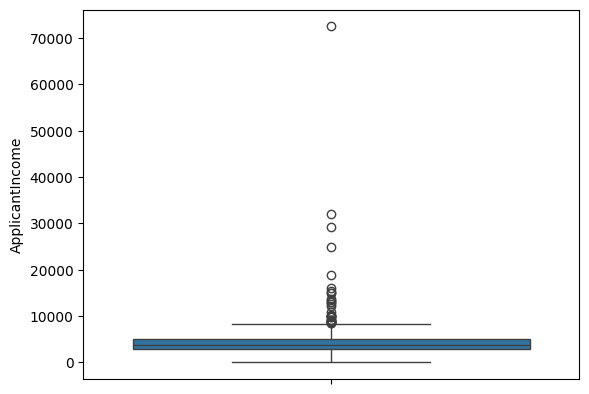

Q1 is 2864.0
Q3 is 5060.0
IQR is 2196.0
Upper bound is 8354.0
Lower bound is -430.0


<Axes: ylabel='ApplicantIncome'>

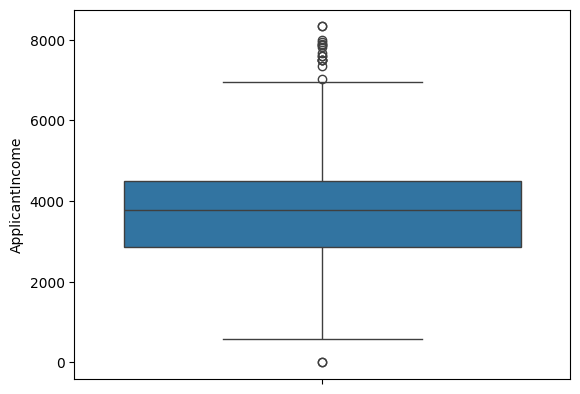

In [ ]:
# Creating Boxplot before filling outliers
sns.boxplot(df['ApplicantIncome'])
plt.show()

#
Q1 = df['ApplicantIncome'].quantile(0.25)
print(f'Q1 is {Q1}')
Q3 = df['ApplicantIncome'].quantile(0.75)
print(f'Q3 is {Q3}')
IQR = Q3 - Q1
print(f'IQR is {IQR}')
# Define upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
print(f'Upper bound is {upper_bound}')
lower_bound = Q1 - 1.5 * IQR
print(f'Lower bound is {lower_bound}')

# Identify outliers
outliers = df[(df['ApplicantIncome'] > upper_bound) | (df['ApplicantIncome'] < lower_bound)]

#
median_income = df['ApplicantIncome'].median()
df['ApplicantIncome'] = np.where(df['ApplicantIncome'] > upper_bound, median_income, df['ApplicantIncome'])
df['ApplicantIncome'] = np.where(df['ApplicantIncome'] < lower_bound, median_income, df['ApplicantIncome'])



# Creating Boxplot after filling outliers
sns.boxplot(df['ApplicantIncome'])

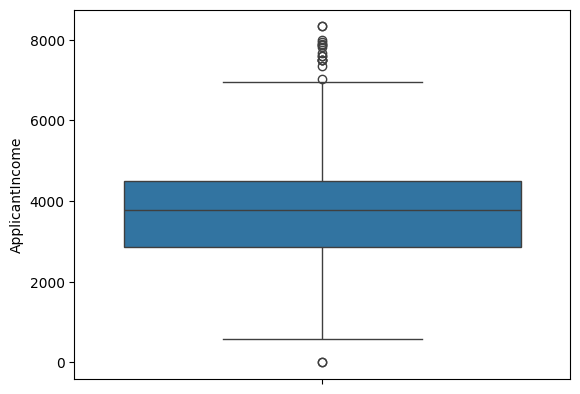

Q1 is 2864.0
Q3 is 4506.5
IQR is 1642.5
Upper bound is 6970.25
Lower bound is 400.25


<Axes: ylabel='ApplicantIncome'>

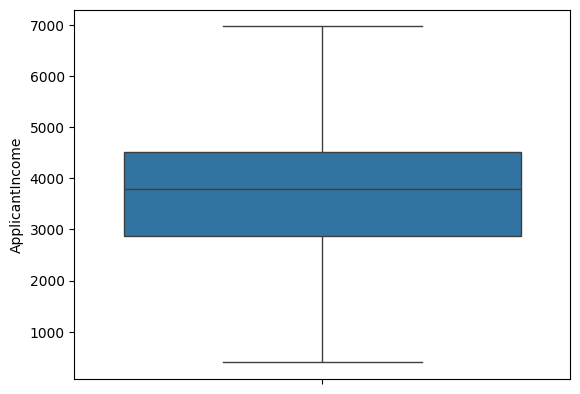

In [ ]:
# Creating Boxplot before filling outliers
sns.boxplot(df['ApplicantIncome'])
plt.show()

#
Q1 = df['ApplicantIncome'].quantile(0.25)
print(f'Q1 is {Q1}')
Q3 = df['ApplicantIncome'].quantile(0.75)
print(f'Q3 is {Q3}')
IQR = Q3 - Q1
print(f'IQR is {IQR}')
# Define upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
print(f'Upper bound is {upper_bound}')
lower_bound = Q1 - 1.5 * IQR
print(f'Lower bound is {lower_bound}')

# Identify outliers
outliers = df[(df['ApplicantIncome'] > upper_bound) | (df['ApplicantIncome'] < lower_bound)]

# now i m using capping method to handel outliers in my data set
# Replace outliers with the upper and lower bounds
df['ApplicantIncome'] = np.where(df['ApplicantIncome'] > upper_bound, upper_bound, df['ApplicantIncome'])
df['ApplicantIncome'] = np.where(df['ApplicantIncome'] < lower_bound, lower_bound, df['ApplicantIncome'])

# Creating Boxplot after filling outliers
sns.boxplot(df['ApplicantIncome'])

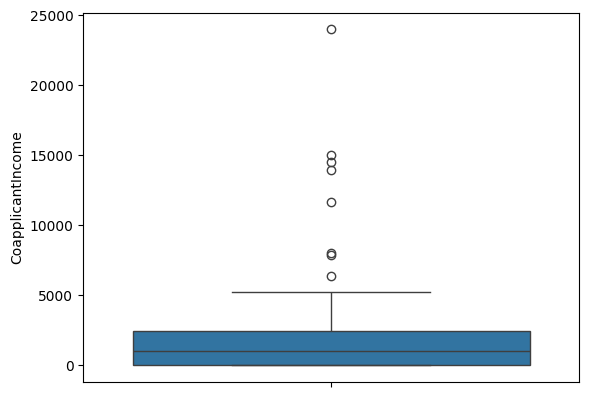

Q1 is 0.0
Q3 is 2430.5
IQR is 2430.5
Upper bound is 6076.25
Lower bound is -3645.75


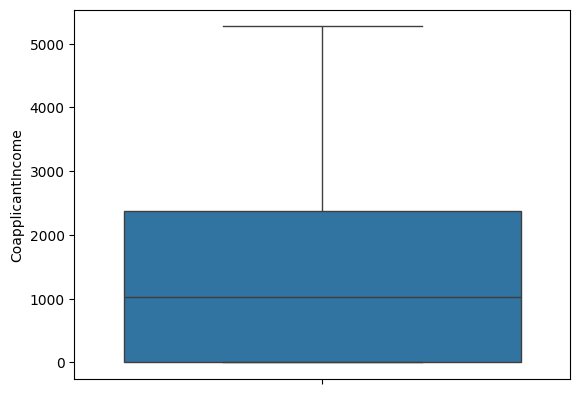

In [ ]:
# Creating Boxplot before filling outliers
sns.boxplot(df['CoapplicantIncome'])
plt.show()

#
Q1 = df['CoapplicantIncome'].quantile(0.25)
print(f'Q1 is {Q1}')
Q3 = df['CoapplicantIncome'].quantile(0.75)
print(f'Q3 is {Q3}')
IQR = Q3 - Q1
print(f'IQR is {IQR}')
# Define upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
print(f'Upper bound is {upper_bound}')
lower_bound = Q1 - 1.5 * IQR
print(f'Lower bound is {lower_bound}')

# Identify outliers
outliers = df[(df['CoapplicantIncome'] > upper_bound) | (df['CoapplicantIncome'] < lower_bound)]

#
median_income = df['CoapplicantIncome'].median()
df['CoapplicantIncome'] = np.where(df['CoapplicantIncome'] > upper_bound, median_income, df['CoapplicantIncome'])
df['CoapplicantIncome'] = np.where(df['CoapplicantIncome'] < lower_bound, median_income, df['CoapplicantIncome'])



# Creating Boxplot after filling outliers
sns.boxplot(df['CoapplicantIncome'])
plt.show()

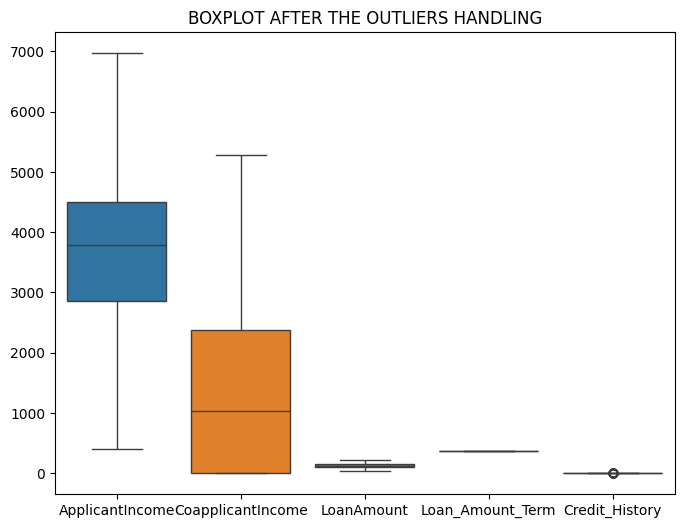

In [ ]:
# BOX PLOT FOR ALL COLUMNS AFTER HANDELING ALL COLUMNS

plt.figure(figsize=(8, 6))
sns.boxplot(df)
plt.title("BOXPLOT AFTER THE OUTLIERS HANDLING")
plt.show()

INSIGHTS FROM THE ABOVE HISTOGRAMS :




*   ApplicantIncome: The distribution shows a peak around 4000, indicating that most applicants have an income in this range.
*   CoapplicantIncome: The distribution peaks at 0, suggesting that many applicants do not have a coapplicant or the coapplicant's income is not significant.



*   LoanAmount: The peak around 100 suggests that most loan amounts are around this value.


*   Loan_Amount_Term: The single bar at 360 indicates that the majority of loan terms are around 360 months (30 years).



*   Credit_History: The peak at 1 shows that most applicants have a credit history of 1, indicating a good credit record.


















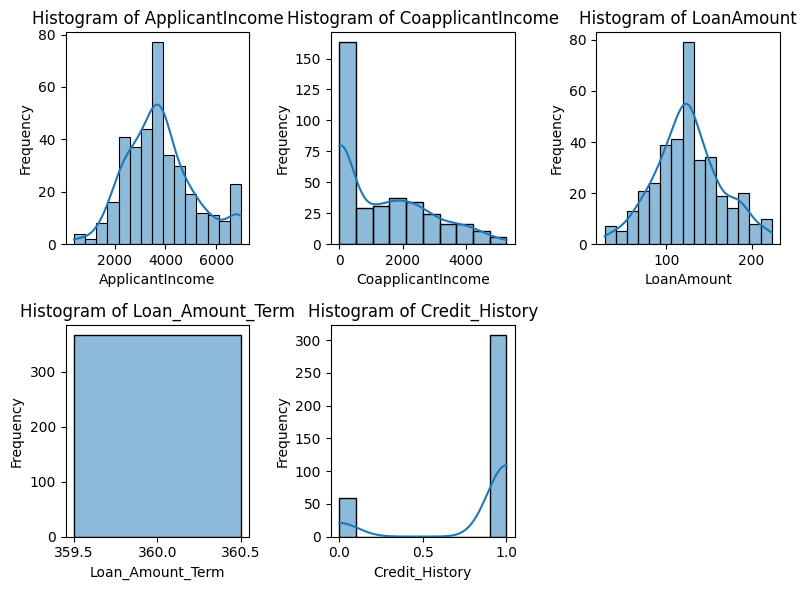

In [ ]:
# Exploring the distribution of numeric columns using the following visualizations :
# Histograms: Plot the frequency distribution of key numeric variables.

numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Creating histogram for numerical columns
plt.figure(figsize=(8, 6))

for column in numerical_columns:
    plt.subplot(2, 3, numerical_columns.index(column) + 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.tight_layout()
plt.show()


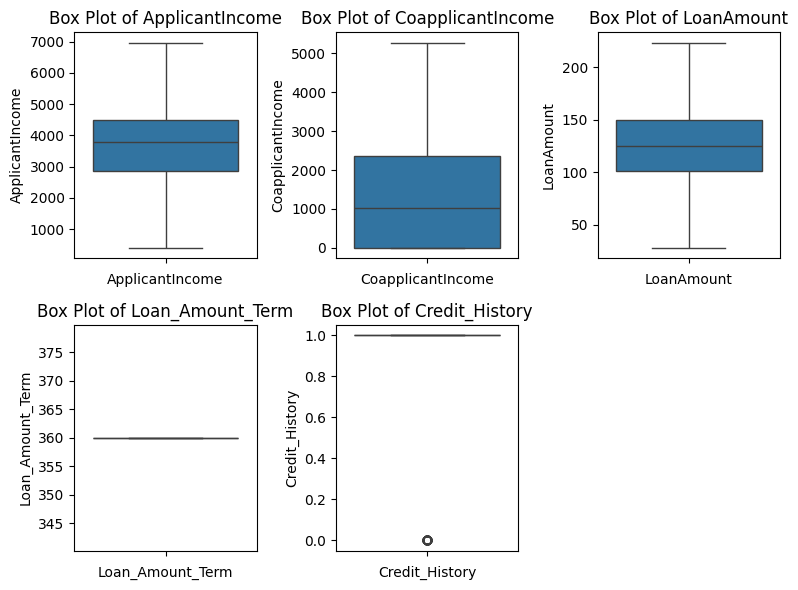

In [ ]:
# Box Plots: Identify potential outliers and visualize the spread of data

plt.figure(figsize=(8, 6))

plt.subplot(2, 3, 1)
sns.boxplot(df['ApplicantIncome'])
plt.title('Box Plot of ApplicantIncome')
plt.xlabel('ApplicantIncome')

plt.subplot(2, 3, 2)
sns.boxplot(df['CoapplicantIncome'])
plt.title('Box Plot of CoapplicantIncome')
plt.xlabel('CoapplicantIncome')

plt.subplot(2, 3, 3)
sns.boxplot(df['LoanAmount'])
plt.title('Box Plot of LoanAmount')
plt.xlabel('LoanAmount')

plt.subplot(2, 3, 4)
sns.boxplot(df['Loan_Amount_Term'])
plt.title('Box Plot of Loan_Amount_Term')
plt.xlabel('Loan_Amount_Term')

plt.subplot(2, 3, 5)
sns.boxplot(df['Credit_History'])
plt.title('Box Plot of Credit_History')
plt.xlabel('Credit_History')

plt.tight_layout()
plt.show()


INSIGHTS FROM THE ABOVE QUESTION :

*   ApplicantIncome: The majority of the data is concentrated below 10,000, with several outliers extending up to 70,000. This indicates that most applicants have a moderate income, but there are a few with significantly higher incomes.



*   CoapplicantIncome: Most of the data is concentrated below 5,000, with outliers extending up to 20,000. This suggests that many applicants do not have a coapplicant or the coapplicant's income is relatively low.


*   LoanAmount: The majority of the data is concentrated below 200, with outliers extending up to 500. This indicates that most loan amounts are moderate, but there are a few larger loan requests.




*   Loan_Amount_Term: Most of the data is concentrated below 360, with outliers extending up to 480. This suggests that the majority of loan terms are around 30 years, with a few longer terms.



*   Credit_History: Most of the data points are at 1, with a few outliers at 0. This indicates that most applicants have a good credit history, with a few exceptions.





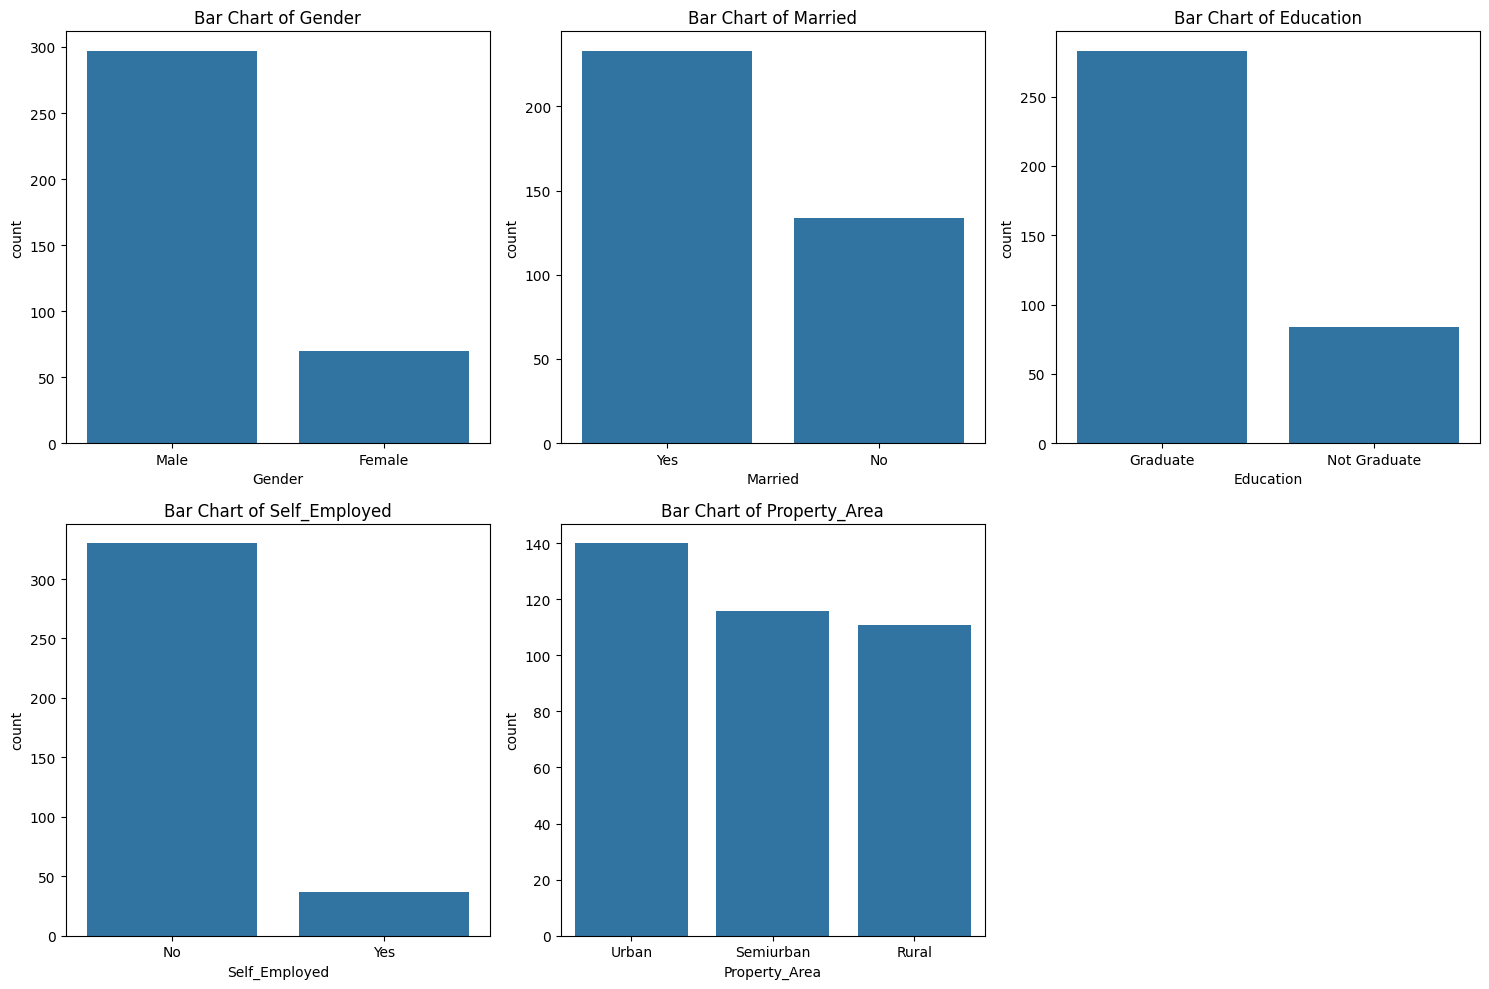

In [ ]:

# Analyzing categorical variables by creating the following plots:
# Bar Charts: Visualize the frequency distribution of categorical variables
categorical_columns = df.select_dtypes(include=['object']).drop(['Loan_ID','Dependents'],axis =1,errors='ignore').columns.tolist()
categorical_columns
plt.figure(figsize=(15, 10))
for column in categorical_columns:
    plt.subplot(2, 3, categorical_columns.index(column) + 1)
    sns.countplot(x=df[column])
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.tight_layout()
plt.show()

INSIGHTS FROM THE ABOVE QUESTION :

*   Gender: There are significantly more males (around 300) compared to females (around 80). This indicates a higher number of male applicants.

*   Marital Status: There are more married individuals (around 220) compared to unmarried individuals (around 140). This suggests that a majority of the applicants are married.



*   Education: There are more graduates (around 270) compared to non-graduates (around 80). This indicates that most applicants have a higher level of education.


*   Self-Employed: There are significantly more individuals who are not self-employed (around 320) compared to those who are self-employed (around 50). This suggests that most applicants are employed by others.




*   Property Area: The counts are relatively close, with urban areas having the highest count (around 140), followed by semiurban (around 120), and rural areas (around 100). This indicates a diverse distribution of property areas among the applicants.






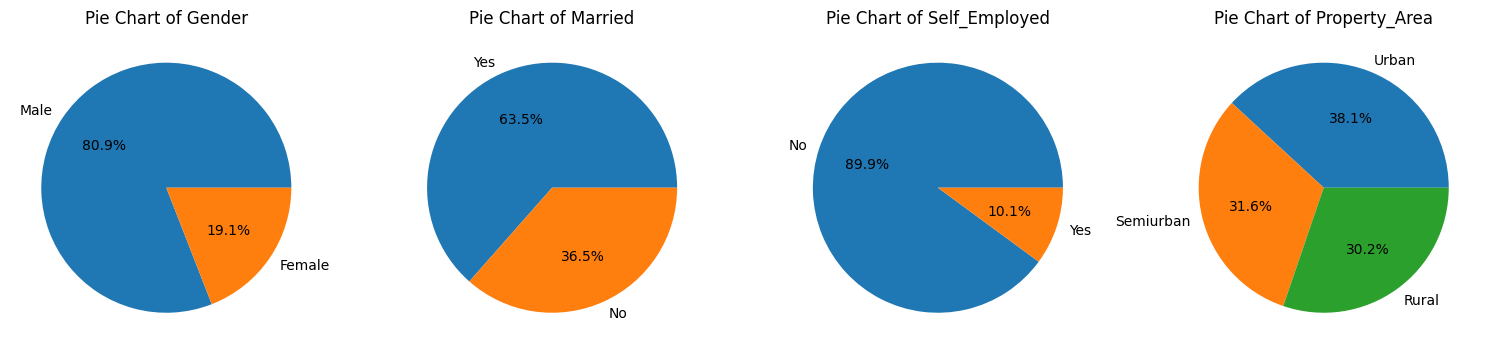

In [ ]:
# Pie Charts: Represent the composition of categorical variables.


categorical_columns = df.select_dtypes(include=['object']).drop(['Loan_ID','Dependents','Education'],axis =1,errors='ignore').columns.tolist()

fig, axes = plt.subplots(1, len(categorical_columns), figsize=(15, 10))

for i, column in enumerate(categorical_columns):
    category_counts = df[column].value_counts()
    axes[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
    axes[i].set_title(f'Pie Chart of {column}')

plt.tight_layout()
plt.show()

INSIGHTS FROM THE ABOVE QUESTION :

*   Gender: The majority of applicants are male (80.9%), while females make up 19.1%. This indicates a higher number of male applicants.



*   Marital Status: Most applicants are married (63.5%), while 36.5% are unmarried. This suggests that a majority of the applicants are married.


*   Self-Employed: A significant majority of applicants are not self-employed (89.9%), while only 10.1% are self-employed. This indicates that most applicants are employed by others.




*   Property Area: The distribution of property areas among the applicants is relatively balanced, with urban areas having the highest count (38.1%), followed by semiurban (31.6%), and rural areas (30.2%).



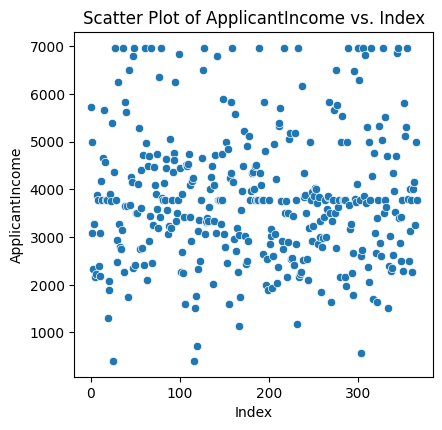

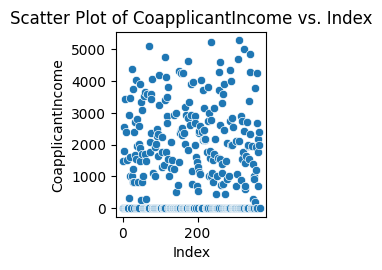

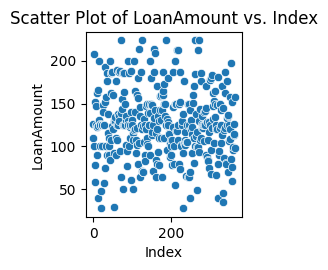

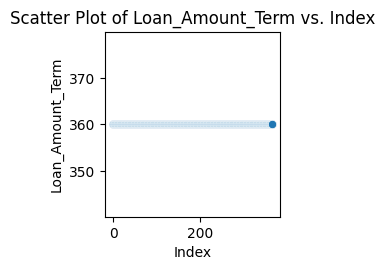

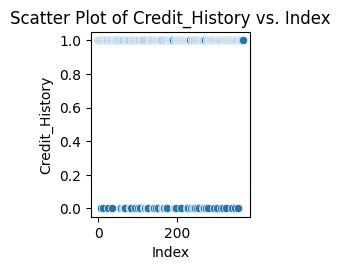

In [ ]:

# Create scatter plots to explore relationships between pairs of numeric variables
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
plt.figure(figsize=(12, 8))

for column in numerical_columns:
    plt.subplot(2, 3, numerical_columns.index(column) + 1)
    sns.scatterplot(x=df.index, y=df[column])
    plt.title(f'Scatter Plot of {column} vs. Index')
    plt.xlabel('Index')
    plt.tight_layout()
    plt.show()

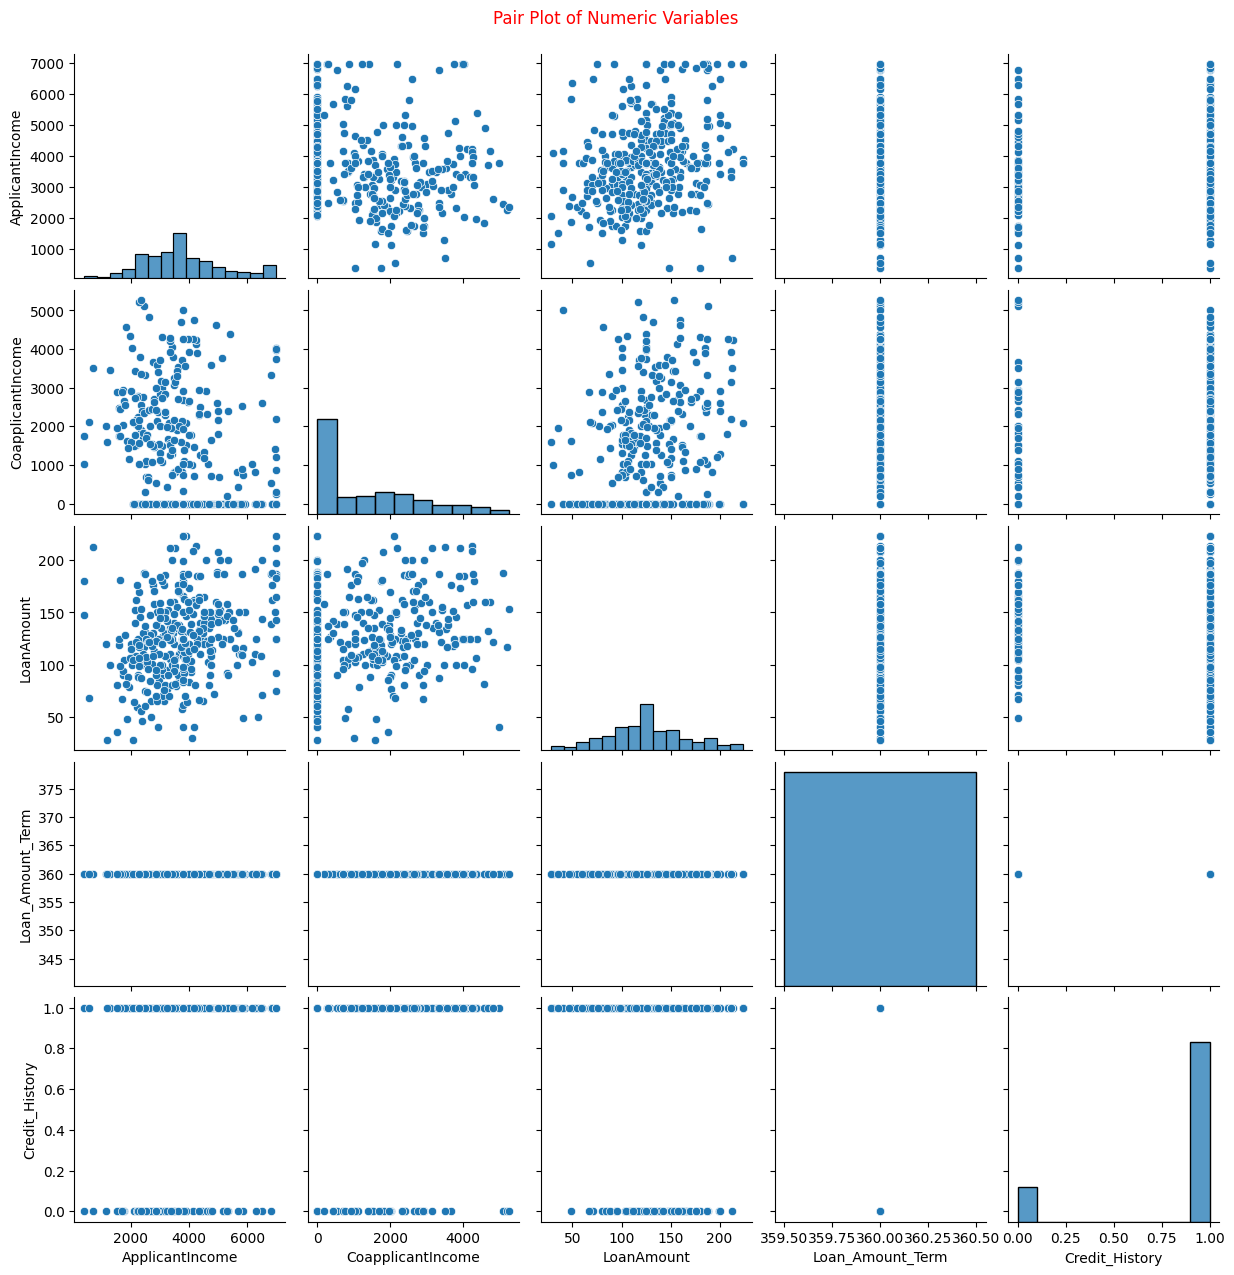

In [ ]:
# Use pair plots (scatter matrix) to visualize interactions between multiple numeric variables simultaneously.
sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot of Numeric Variables',y=1.02,color='red')
plt.show()

INSIGHTS FROM THE ABOVE QUESTION:

* ApplicantIncome: The histograms show that most applicants have an income below 10,000, with a few outliers having significantly higher incomes. The scatter plots indicate a positive correlation between ApplicantIncome and LoanAmount

*  CoapplicantIncome: The histograms reveal that many coapplicants have an income of 0, suggesting that they do not contribute financially. The scatter plots show a positive correlation between CoapplicantIncome and LoanAmount.



*   LoanAmount: The histograms indicate that most loan amounts are below 200, with a few outliers requesting higher amounts. The scatter plots show positive correlations with both ApplicantIncome and CoapplicantIncome.


*   Loan_Amount_Term: The histograms show that most loan terms are around 360 months (30 years). The scatter plots do not show strong correlations with other variables.







*   Credit_History: The histograms reveal that most applicants have a credit history of 1, indicating a good credit record. The scatter plots show that applicants with a credit history of 1 are more likely to have higher loan amounts.



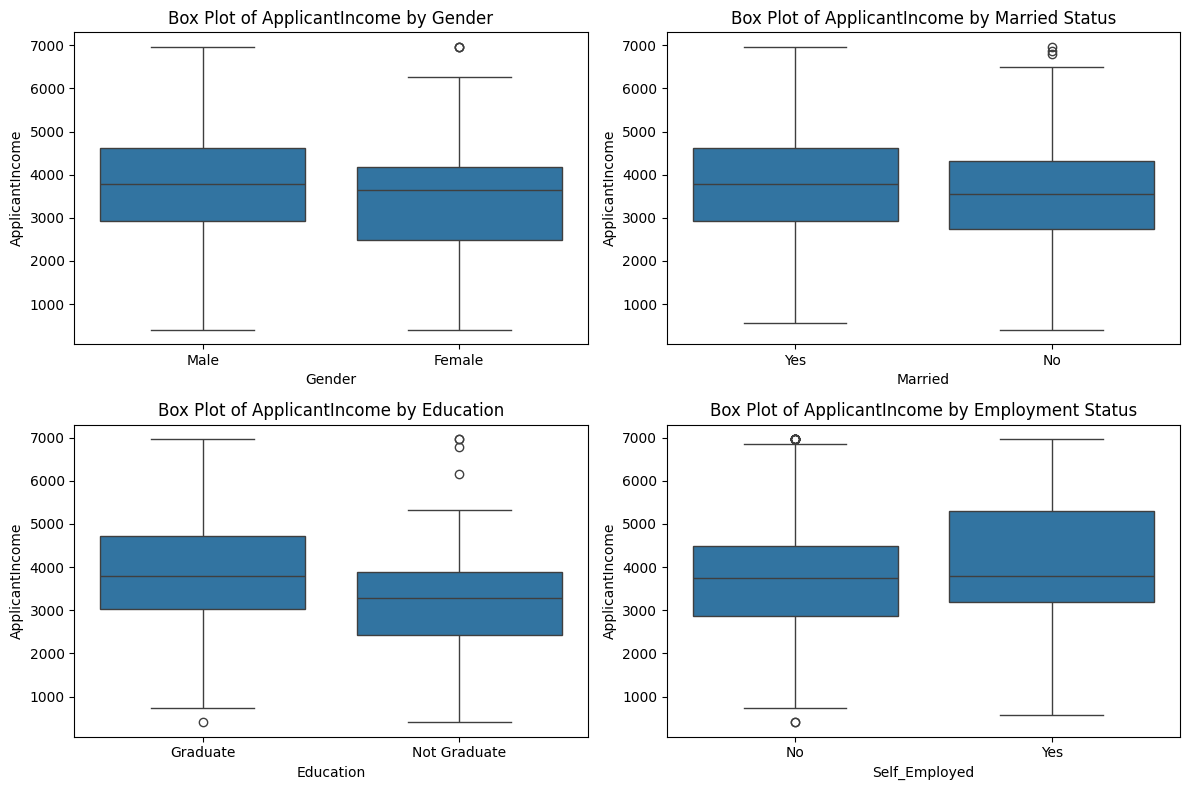

In [ ]:
#Investigate the relationship between categorical and numeric variables using box plots

# Create box plots for each combination of numerical and categorical columns

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x='Gender', y='ApplicantIncome', data=df)
plt.title('Box Plot of ApplicantIncome by Gender')
plt.xlabel('Gender')
plt.ylabel('ApplicantIncome')

plt.subplot(2, 2, 2)
sns.boxplot(x='Married', y='ApplicantIncome', data=df)
plt.title('Box Plot of ApplicantIncome by Married Status')
plt.xlabel('Married')
plt.ylabel('ApplicantIncome')

plt.subplot(2, 2, 3)
sns.boxplot(x='Education', y='ApplicantIncome', data=df)
plt.title('Box Plot of ApplicantIncome by Education')
plt.xlabel('Education')
plt.ylabel('ApplicantIncome')

plt.subplot(2, 2, 4)
sns.boxplot(x='Self_Employed', y='ApplicantIncome', data=df)
plt.title('Box Plot of ApplicantIncome by Employment Status')
plt.xlabel('Self_Employed')

plt.tight_layout()
plt.show()

INSIGHTS FROM THE ABOVE QUESTION :

*   Gender: The box plot shows that the median income for males is higher than that for females. There are also more outliers among males, indicating a wider range of incomes.



* Marital Status: Married applicants tend to have a higher median income compared to unmarried applicants. There are also more outliers among married applicants, suggesting a greater variation in incomes.


*  Education: Graduates have a higher median income compared to non-graduates. The range of incomes is also wider for graduates, with more outliers present.



*   Employment Status: Self-employed individuals have a higher median income compared to those who are not self-employed. There are also more outliers among self-employed individuals, indicating a greater variation in incomes.



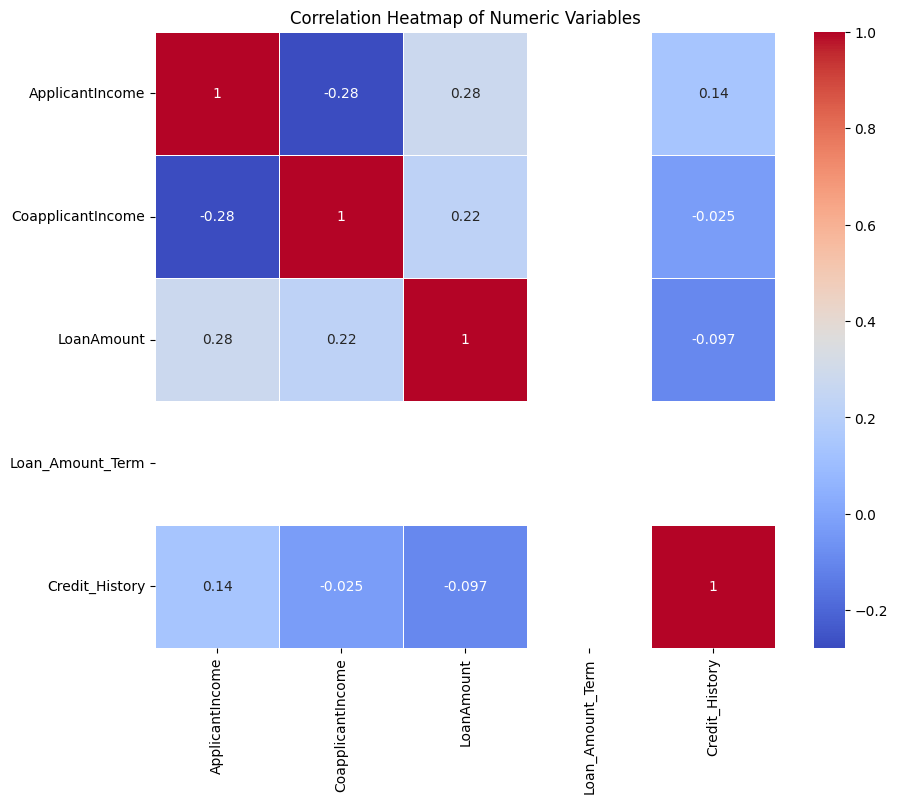

In [ ]:

#  Perform a correlation analysis to identify relationships between numeric variables. Visualize correlations using a heatmap.
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Calculating the correlation_matrix
correlation_matrix = df[numerical_columns].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()



INSIGHTS FROM THE ABOVE QUESTION :

* ApplicantIncome:

Positively correlated with LoanAmount (0.49), indicating that higher applicant incomes are associated with higher loan amounts.

Weak positive correlation with Credit_History (0.095), suggesting that applicants with higher incomes tend to have a good credit history.

Weak negative correlation with CoapplicantIncome (-0.11), indicating that higher applicant incomes are slightly associated with lower coapplicant incomes.
*   CoapplicantIncome:

Weak positive correlation with LoanAmount (0.15), suggesting that higher coapplicant incomes are slightly associated with higher loan amounts.

Weak negative correlation with Credit_History (-0.058), indicating that higher coapplicant incomes are slightly associated with poorer credit history.

*   LoanAmount:

Weak positive correlation with Loan_Amount_Term (0.092), indicating that higher loan amounts are slightly associated with longer loan terms.

Weak negative correlation with Credit_History (-0.013), suggesting that higher loan amounts are slightly associated with poorer credit history.
*   Loan_Amount_Term:

Weak negative correlation with Credit_History (-0.048), indicating that longer loan terms are slightly associated with poorer credit history.





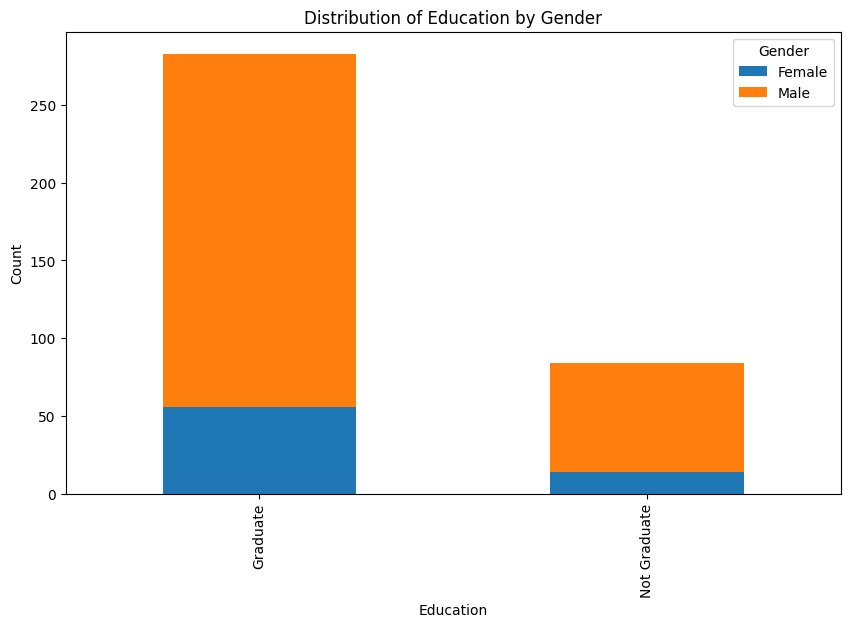

In [ ]:
# Create a stacked bar chart to show the distribution of categorical variables across multiple categorries
categorical_columns = df.select_dtypes(include=['object']).drop(['Loan_ID','Dependents'],axis =1,errors='ignore').columns.tolist()

# Creating a cross-tabulation
cross_tab = pd.crosstab(df['Education'], df['Gender'])

# Ploting the stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Education by Gender')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

INSIGHTS FROM THE ABOVE GRAPH :

*   Graduates: The number of graduates is significantly higher than the number of non-graduates. Among graduates, males outnumber females, with the male count being approximately 250 and the female count being around 50.


*   Non-Graduates: Among non-graduates, males also outnumber females, with the male count being around 50 and the female count being slightly above 0.



SUMMARIZING THE KEY FINDINGS DRAWING CONCLUSIONS AND PROVIDING RECOMMENDATIONS BASED ON THE INSIGHTS GAINED FROM THE ANALYSIS :

Key Findings :

Demographics: Most applicants are male, married, and graduates. There is a higher representation of applicants from urban and semi-urban areas compared to rural areas.

Income: The majority of applicants have a moderate income, with a few outliers having significantly higher incomes. Co-applicants often have lower or no income, suggesting they may not be primary contributors to loan repayment.

Loan Characteristics: Most loan amounts are moderate, with a few outliers requesting larger loans. Loan terms are typically around 30 years, with a few longer terms. Most applicants have a good credit history.

Relationships: There is a positive correlation between ApplicantIncome and LoanAmount, indicating that higher applicant incomes are associated with higher loan amounts. A similar positive correlation exists between CoapplicantIncome and LoanAmount, though it is weaker.

Categorical Insights: Males generally have higher incomes than females. Married applicants tend to have higher incomes than unmarried applicants. Graduates have higher incomes compared to non-graduates. Self-employed individuals have higher incomes than those who are not self-employed.


Conclusions :

Loan applications are primarily driven by males with moderate to high incomes, who are more likely to be married and graduates.

Co-applicants' income plays a less significant role in loan applications, suggesting their financial contribution may be secondary.

Applicants with higher incomes and good credit history are more likely to be approved for larger loan amounts.

Loan approval may be influenced by demographic factors such as gender, marital status, education, and employment status.



Recommendations :

Targeted Marketing: Focus marketing efforts on males, married individuals, and graduates, as they constitute a larger portion of loan applicants.

Co-applicant Assessment: Develop a more nuanced assessment of co-applicants' financial situation to better evaluate their contribution to loan repayment.

Income Verification: Implement robust income verification processes to ensure accuracy and mitigate risks associated with outlier incomes.

Credit History: Emphasize the importance of maintaining a good credit history to improve loan approval chances.

Demographic Considerations: Analyze the impact of demographic factors on loan approval to address potential biases or disparities.